In [1]:
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt 
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm


1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


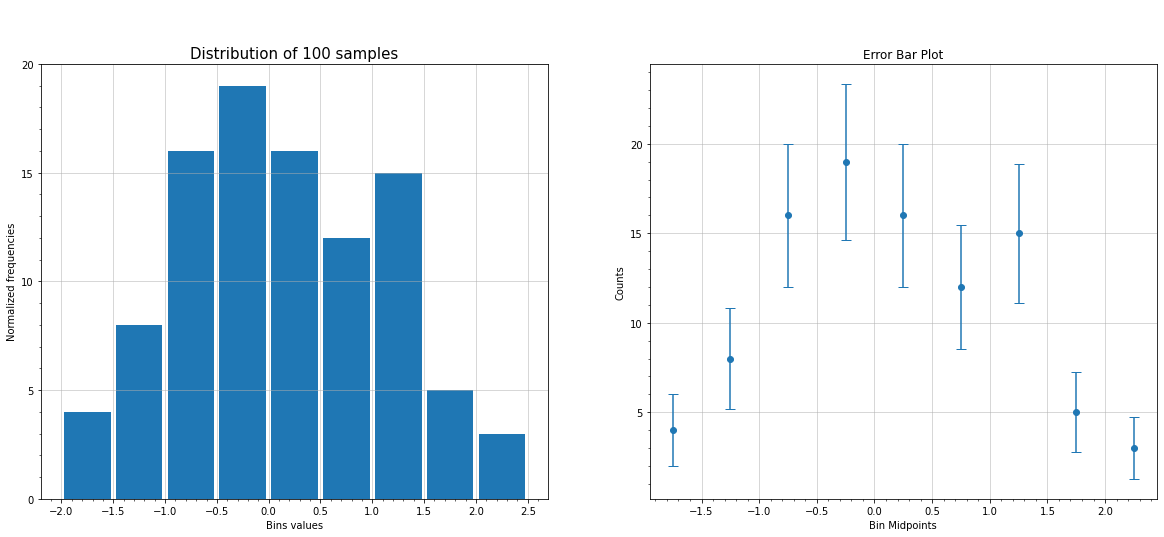

In [2]:
#defining parameters of ditributions including bins
mean, std, N = 0, 1, 100
gaussian = np.random.normal(mean, std, N) 
gaussian_bins = np.arange(round(gaussian.min()),round(gaussian.max()), round(gaussian.max() - gaussian.min())/(N*0.1))

#creating plot 
fig = plt.figure(figsize=(20,8))
fig.suptitle(' ')
ax = fig.add_subplot(1,2,1)

ax.hist(gaussian, gaussian_bins, rwidth=0.9)
ax.set_title(f"Distribution of {N} samples", fontsize = 15)
ax.set_xlabel('Bins values')
ax.set_ylabel('Normalized frequencies')
ax.set_yticks(np.arange(0,25,5))
ax.set_xticks(gaussian_bins)
ax.minorticks_on()
ax.grid(linewidth = 0.5)


#now lets do it but for errorbar plot 
# Creating histogram
hist = np.histogram(gaussian, gaussian_bins)

# Calculate the midpoints of the bins
bin_midpoints = (gaussian_bins[:-1] + gaussian_bins[1:]) / 2

# Calculate the errors (Poisson uncertainty)
errors = np.sqrt(hist[0])

ax1 = fig.add_subplot(1, 2, 2)
ax1.errorbar(x=bin_midpoints, y=hist[0], yerr=errors, fmt='o', capsize=5)
ax1.set_title('Error Bar Plot')
ax1.set_xlabel('Bin Midpoints')
ax1.set_ylabel('Counts')
ax1.minorticks_on()
ax1.grid(linewidth=0.5)




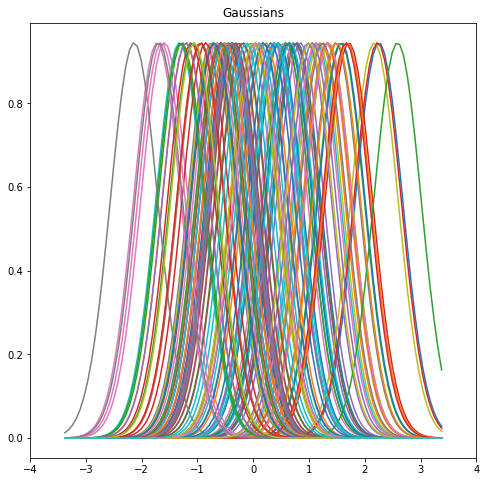

In [3]:
#defining std and x axis
st = 1.06 * std* (N**(-1/5))
x = np.linspace(-8*st, 8*st, N)

# defining a matrix of gaussians by using previous gaussian array, stats parameters and by using stats.norm()
x_mat = np.array([norm.pdf(x, loc=gaussian_i, scale=st) for gaussian_i in gaussian])

#plotting all the gaussian 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('Gaussians')

ax.set_xlim(-4,4)
for n in range(N):
    ax.plot(x,x_mat[n,:])


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

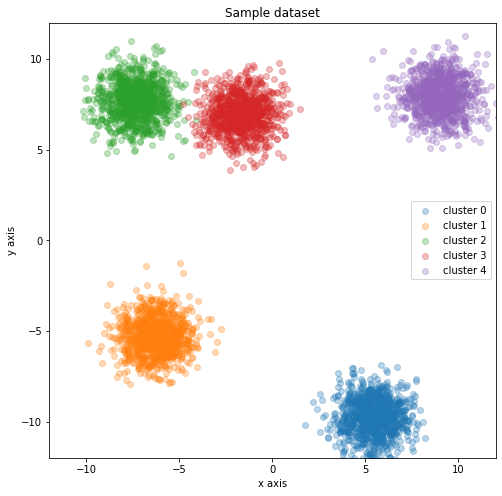

In [4]:


#defining a function that generates data from multivariate gaussian distribution
def gaussian_multivariate_dataset(n_class:int,n_points:int):
    
    #defining parameters for multivariate gaussian
    means = np.random.uniform(-10,10,size=(n_class,2))
    c =np.eye(2)

    #inizialising data matrix 
    data_points = np.ones((n_class,n_points,2))

    #generating points
    for i in range(n_class):
    
       data_points[i] = np.random.multivariate_normal(means[i],cov=c,size=n_points)

    return data_points
    

data = gaussian_multivariate_dataset(5,1000)

#plotting 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.set_title('Sample dataset') 
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_xlim(-12,12)
ax.set_ylim(-12,12)
for d in range(data.shape[0]):
    ax.scatter(data[d,:,0], data[d,:,1], label = f'cluster {d}', alpha=0.3)
ax.legend()


    


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot


In [5]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2024-01-19 11:47:12--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2024-01-19 11:47:12--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc61d2abf70ec0a412d7acf56c83.dl.dropboxusercontent.com/cd/0/inline/CLoHbXyzzvEUTZwU_pv90V6WmWj0Zmpr5pXu7GGzgXzvxVE13UXf1DJqIncNxCvTaPQdTBdlSQZSoZebdVo97X5jfK2X9v6hJxQl6cRv4alaQ49wKWowaxGsc-dltFbw_RA/file# [following]
--2024-01-19 11:47:12--  https://uc61d2abf70ec0a412d7acf56c83.dl.dropboxusercontent.com/cd/0/inline/CLoHbXyzzvEUTZwU_pv90V6WmWj0Zmpr5pXu7GGzgXzvxVE13UXf1DJqIncNxCvTaPQdTBdlSQZSoZebdVo97X5jfK2X9v6hJxQl6cRv4alaQ49wKWowaxGsc-dltFbw_RA/fi

In [16]:
import pandas as pd

#import dataset 
path = '/Users/giacomo/Desktop/git/POD/LaboratoryOfComputationalPhysics_Y6/residuals_261.npy'
data = np.load(path,allow_pickle = True)
df = pd.DataFrame(data.item())


REGRESSION STATS

slope 0.0032597701220305835
intercept -0.15432816763069473
r values 0.04340351052255908


Text(1, 2, 'y = 0.003x -0.154')

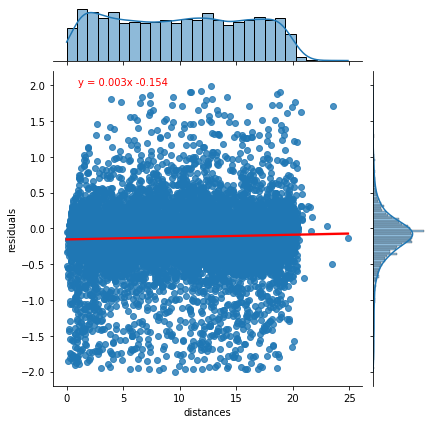

In [17]:
import scipy as sp 
from scipy import stats
import seaborn as sns

#inpect dataset
df

#defining a mask and filtering the dataset
mask = abs(df['residuals']) < 2
df = df[mask]

#computing the regression
slope, intercept, r, p, se = sp.stats.linregress( df['distances'], df['residuals'])
print('REGRESSION STATS\n')
print('slope',slope)
print('intercept', intercept)
print('r values', r)

#joinplot with regression... nothing particular to see
sns.jointplot(data = df, x = 'distances', y = 'residuals',  kind='reg', palette='Set2', line_kws = dict (color = 'r'))
plt.text(1,2,f'y = {slope:.3f}x {intercept:.3f}', color='red')

* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

/var/folders/_s/2s21xhb13jnbnmyj398wc3s40000gn/T/ipykernel_40634/1572277442.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(bins_mean,residuals_mean,yerr=erry, color='black', fmt='bo', elinewidth=0.7)


<ErrorbarContainer object of 3 artists>

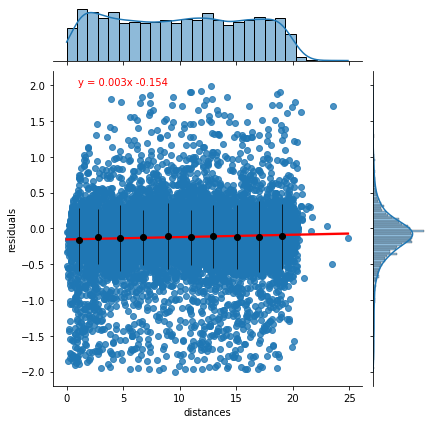

In [47]:
#sorting the distances to evaluate the centers for the bins
distances_sorted = df['distances'].sort_values()

#defining bins parameter 
n_bins = round(df.shape[0]*0.001)
elements_per_bin = int(df.shape[0]/n_bins)

#initialising bins array 
bins_mean = np.ones(n_bins)

#Calculating the mean of the bins and populating the arrayfor i in range(1,n_bins+1):
for i in range(1,n_bins+1):
    bin = (distances_sorted[(i-1)*(elements_per_bin):i*(elements_per_bin)])
    bins_mean[i-1] = bin.sum()/bin.shape

#initializing and populating the last two arrays
residuals_mean = np.ones(n_bins)
erry = np.ones(n_bins)
for i in range(1,n_bins+1):
    erry[i-1] = df['residuals'][(i-1)*(elements_per_bin):i*(elements_per_bin)].std()
    residuals_mean[i-1] = df['residuals'][(i-1)*(elements_per_bin):i*(elements_per_bin)].mean()


#joinplot with regression... nothing particular to see
sns.jointplot(data = df, x = 'distances', y = 'residuals',  kind='reg', palette='Set2', line_kws = dict (color = 'r'))
plt.text(1,2,f'y = {slope:.3f}x {intercept:.3f}', color='red')
plt.errorbar(bins_mean,residuals_mean,yerr=erry, color='black', fmt='bo', elinewidth=0.7)